In [1]:
import torch
from torch import nn as nn
from torch.utils.data import Dataset
from torch import optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
import pandas as pd 
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
class DataSet(Dataset):
    def __init__(self, path):
        self.dataset = torch.tensor(pd.read_csv(path).values)

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, i):
        return self.dataset[i,:-1], self.dataset[i,-1]

In [3]:
class Net(nn.Module):

    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features #13
        
        #fully connected
        self.fc1 = nn.Linear(self.n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))

        return out

In [4]:
def trainin_loop(n_epoch, optimizer, model, loss_fn, train_loader, test_loader, print_plot):
    train_accuracy = torch.zeros(n_epoch)
    test_accuracy = torch.zeros(n_epoch)
    for epoch in range(n_epoch):
        for example, labels in train_loader:
            example = example.to(DEVICE)
            labels = labels.to(DEVICE)
            labels = labels.unsqueeze(1)
            output = model(example.float())
            loss = loss_fn(output, labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]: 
                correct = 0
                total = 0
                
                for examples, labels in loader: 
                    examples = examples.to(device = DEVICE) 
                    labels = labels.to(device = DEVICE).view(-1, 1)
                    outputs	= model(examples.float())
                    predicted = torch.round(outputs)
                    total = labels.shape[0] 
                    correct = (predicted == labels).sum()
                accuracy[epoch] = correct / total
        if (epoch+1) % 10 ==0:
            print(f'Epoch {epoch+1})',
                f'Train Accuracy: {train_accuracy[epoch]}', 
                f'Test Accuracy: {test_accuracy[epoch]}')

    if print_plot:
        #Setting x-ticks 
        epochs = range(n_epoch)
        #Ptoting both curves, train and vaL
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy') 
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy') 
        plt.title('Training and Test loss') 
        plt.xlabel( 'epochs') 
        plt.ylabel('Loss') 
        plt.legend() 
        plt.show()



In [5]:
data = DataSet(r'heart.csv')
n_sample = len(data)
n_test = int(0.2*n_sample)
train_set, test_set = torch.utils.data.random_split(data, [n_sample-n_test, n_test])

train_loader = torch.utils.data.DataLoader(train_set,batch_size = len(train_set),shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size = len(test_set),shuffle = True)


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.5890243649482727 Test Accuracy: 0.6585366129875183
Epoch 20) Train Accuracy: 0.5914633870124817 Test Accuracy: 0.6585366129875183
Epoch 30) Train Accuracy: 0.6829268336296082 Test Accuracy: 0.6682927012443542
Epoch 40) Train Accuracy: 0.709756076335907 Test Accuracy: 0.7560975551605225
Epoch 50) Train Accuracy: 0.7231707572937012 Test Accuracy: 0.7609755992889404
Epoch 60) Train Accuracy: 0.7512195110321045 Test Accuracy: 0.7560975551605225
Epoch 70) Train Accuracy: 0.7353658676147461 Test Accuracy: 0.7707316875457764
Epoch 80) Train Accuracy: 0.7597560882568359 Test Accuracy: 0.790243923664093
Epoch 90) Train Accuracy: 0.7890244126319885 Test Accuracy: 0.8146341443061829
Epoch 100) Train Accuracy: 0.8292682766914368 Test Accuracy: 0.8341463208198547
Epoch 110) Train Accuracy: 0.8439024686813354 Test Accuracy: 0.8341463208198547
Epoch 120) Train Accuracy: 0.8451219797134399 Test Accuracy: 0.8243902325630188
Epoch 130) Train Accuracy: 0.8609756231307983 Test 

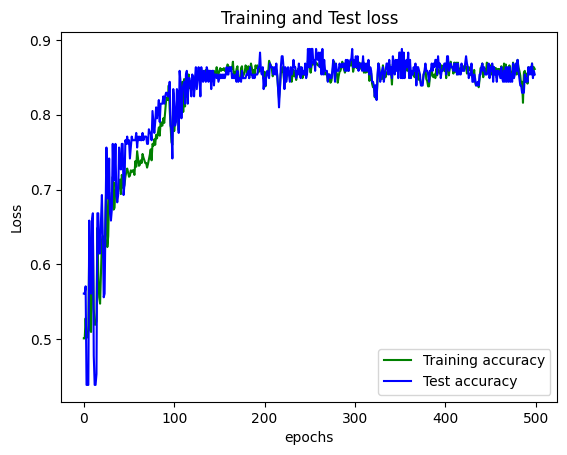

In [8]:
learning_rate = 0.01 
model = Net(len(data[0][0])).to(DEVICE)

optimizizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.BCELoss()

trainin_loop(
n_epoch = 500,
optimizer = optimizizer,
model = model,
loss_fn  = loss_fn,
train_loader = train_loader,
test_loader = test_loader, 
print_plot = True
)


Epoch 10) Train Accuracy: 0.504878044128418 Test Accuracy: 0.5609756112098694
Epoch 20) Train Accuracy: 0.6817073225975037 Test Accuracy: 0.6829268336296082
Epoch 30) Train Accuracy: 0.7036585211753845 Test Accuracy: 0.7219512462615967
Epoch 40) Train Accuracy: 0.7402439117431641 Test Accuracy: 0.7170731425285339
Epoch 50) Train Accuracy: 0.742682933807373 Test Accuracy: 0.7170731425285339
Epoch 60) Train Accuracy: 0.7670731544494629 Test Accuracy: 0.7560975551605225
Epoch 70) Train Accuracy: 0.787804901599884 Test Accuracy: 0.7707316875457764
Epoch 80) Train Accuracy: 0.8121951222419739 Test Accuracy: 0.8292682766914368
Epoch 90) Train Accuracy: 0.8463414907455444 Test Accuracy: 0.8439024686813354
Epoch 100) Train Accuracy: 0.8426828980445862 Test Accuracy: 0.8292682766914368
Epoch 110) Train Accuracy: 0.8524390459060669 Test Accuracy: 0.8390243649482727
Epoch 120) Train Accuracy: 0.8658536672592163 Test Accuracy: 0.8780487775802612
Epoch 130) Train Accuracy: 0.8695122003555298 Test A

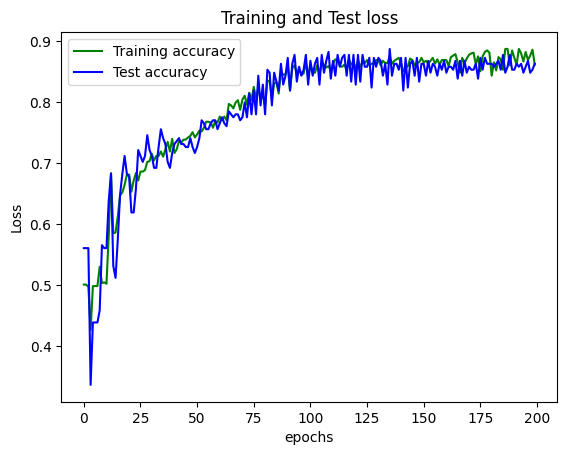

In [10]:
learning_rate = 0.01 
model = Net(len(data[0][0])).to(DEVICE)

optimizizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.BCELoss()

trainin_loop(
n_epoch = 200,
optimizer = optimizizer,
model = model,
loss_fn  = loss_fn,
train_loader = train_loader,
test_loader = test_loader, 
print_plot = True
)

In [7]:
predicted = [1,0,1,0,0]
labels = [1,1,1,0,1]
for x in range(len(labels)):
    print(predicted[x] == labels[x])


True
False
True
True
False
